# Loan prediction problem

## Data and libraries loading 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

#dfTrain = pd.read_csv("C:/Users/solutio/Documents/Proyectos DataScience/LoanPrediction/train.csv")
dfTrain = pd.read_csv('C:/Users/Santi/Documents/DataScience/LoanPrediction/data/train.csv')

## 1. Data exploration (E)

### Taking a glance at the data

Taking a look at the variables we can see that the variable Loan_Status is the target (binary). I should first explore the data looking for missing values, distribution of variables and outliers. A study of the correlation of the variables shouldd come in handy too. Then, it will be necessary to transform some variables, mainly to normalize their distributions and dummify those that are categorical.

In [2]:
dfTrain.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


### Information about the dataset, mainly to see where are the missing values

Take a look at those variables that have emtpy values. It is important to take them into account, maybe not to impute them, because they can be a signal of something else. In the case of loan prediction or defaults, respondents might not share information on purpose. 50 individuals have empty values in their credit history, what if this credit history is so bad they have hidden it?

In [3]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


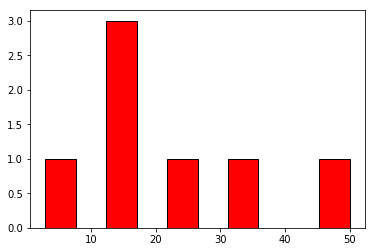

In [4]:
emptyValues = dfTrain.apply(lambda x: x.isnull().sum(), axis='rows')
nonZeroEmptyValues = emptyValues[emptyValues > 0]
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(nonZeroEmptyValues, facecolor='red', edgecolor='black')


### Description of numeric variables

In [5]:
dfTrain.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000



### Counts of non-numeric variables

In [6]:
variables = dfTrain.loc[:, dfTrain.dtypes == np.object]

variablesNoID = variables.loc[:, variables.columns != 'Loan_ID']

emptyValues = variablesNoID.apply(lambda x: x.isnull().sum(), axis='rows')

for column in variablesNoID:
    print(variablesNoID[column].value_counts())
    if (emptyValues[column] > 0):
        print("CAUTION! Missing values: " + str(emptyValues[column]))
    print('\t')

Male      489
Female    112
Name: Gender, dtype: int64
CAUTION! Missing values: 13
	
Yes    398
No     213
Name: Married, dtype: int64
CAUTION! Missing values: 3
	
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
CAUTION! Missing values: 15
	
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
	
No     500
Yes     82
Name: Self_Employed, dtype: int64
CAUTION! Missing values: 32
	
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
	
Y    422
N    192
Name: Loan_Status, dtype: int64
	


## 1.2. Distribution analysis

### Histograms

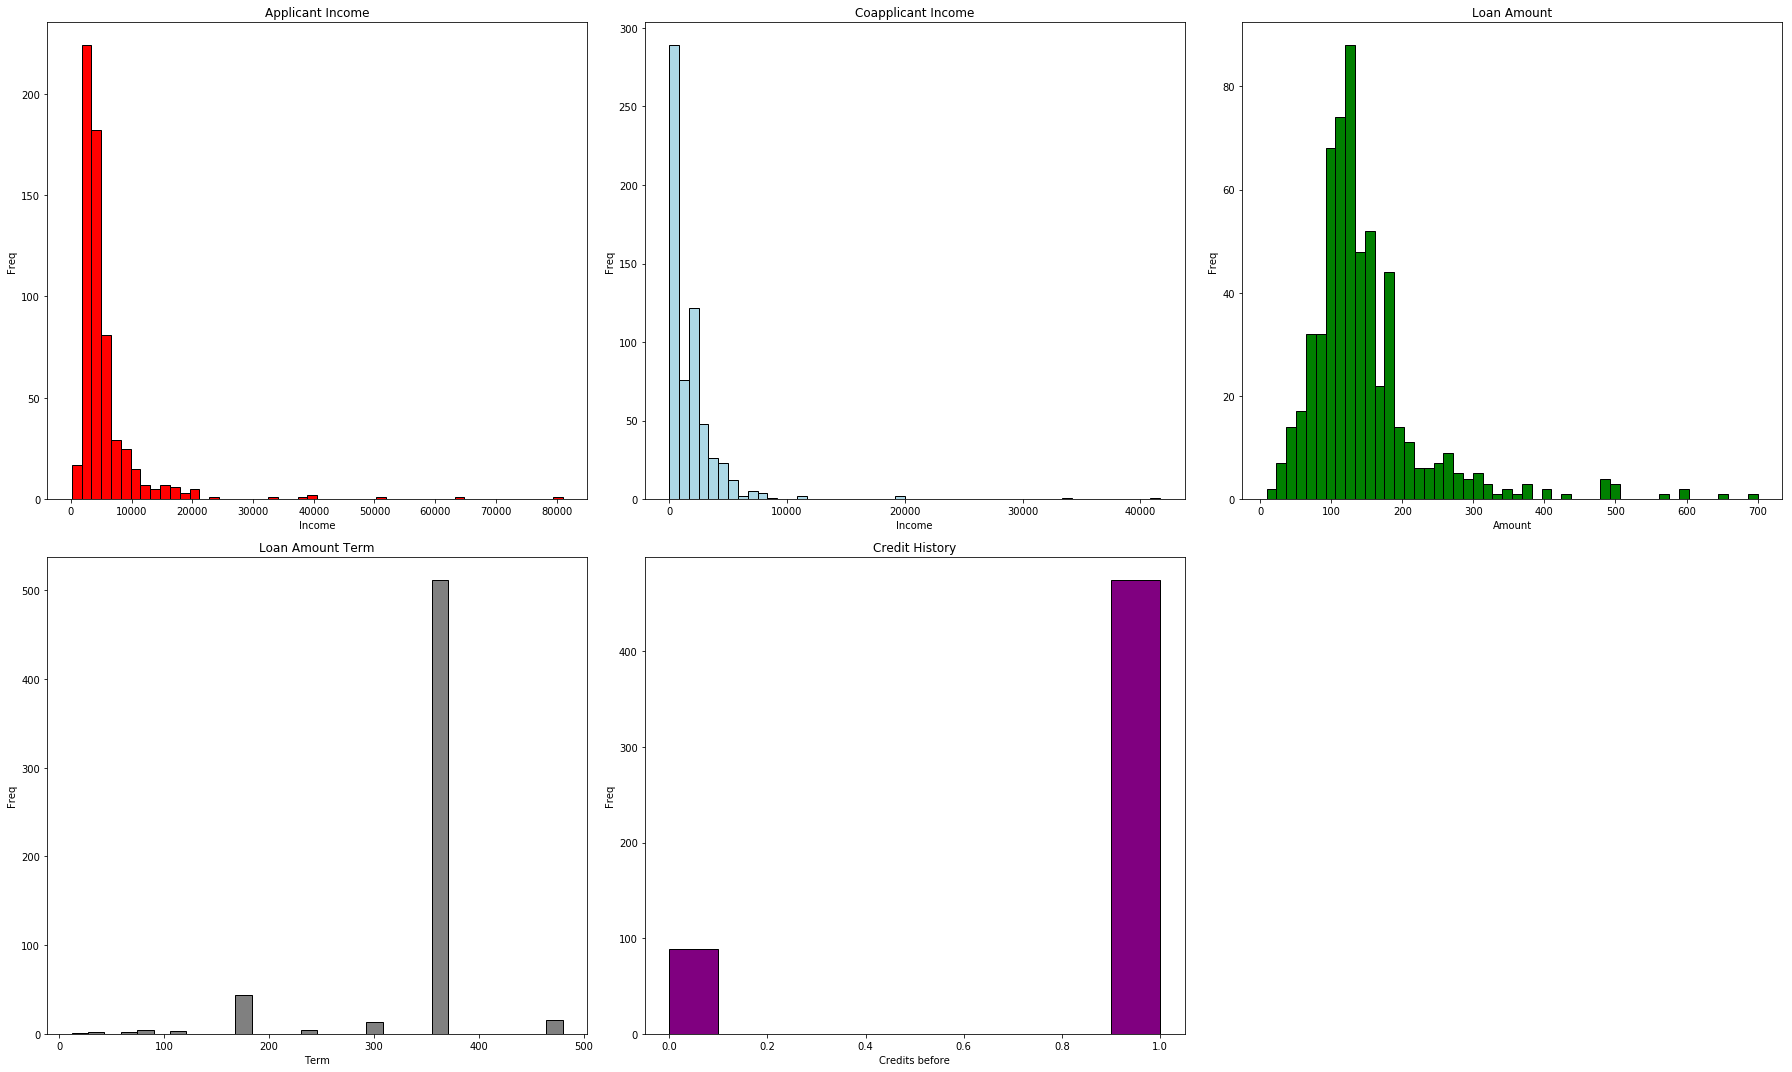

In [7]:
fig = plt.figure(figsize = (25,15))
axesAI = fig.add_subplot(231)
axesCI = fig.add_subplot(232)
axesLA = fig.add_subplot(233)
axesLAT = fig.add_subplot(234)
axesCH = fig.add_subplot(235)

axesAI.hist(dfTrain['ApplicantIncome'], bins = 50, facecolor = 'red', edgecolor = 'black')
axesAI.set(title = 'Applicant Income', xlabel = "Income", ylabel = "Freq")

axesCI.hist(dfTrain['CoapplicantIncome'], bins = 50, facecolor = 'lightblue', edgecolor = 'black')
axesCI.set(title = 'Coapplicant Income', xlabel = "Income", ylabel = "Freq")

axesLA.hist(dfTrain['LoanAmount'].dropna(), bins = 50, facecolor = 'green', edgecolor = 'black')
axesLA.set(title = 'Loan Amount', xlabel = "Amount", ylabel = "Freq")

axesLAT.hist(dfTrain['Loan_Amount_Term'].dropna(), bins = 30, facecolor = 'grey', edgecolor = 'black')
axesLAT.set(title = 'Loan Amount Term', xlabel = "Term", ylabel = "Freq")

axesCH.hist(dfTrain['Credit_History'].dropna(), bins = 10, facecolor = 'purple', edgecolor = 'black')
axesCH.set(title = 'Credit History', xlabel = "Credits before", ylabel = "Freq")

plt.tight_layout()
plt.show()

Seeing the histograms it is clear that applicant income and coapplicant income are skewed to the right. Loan Amount is more normal. The three of them are continuous variables and contain outliers. As for the two below, Loan Amount Term has a pretty weird distribution, since it refers to days, so it is a discrete variable; however, Credit History is telling us if the individual has had any credit before. Since the answer is 'yes' or 'no', the variable can be classified as binary.

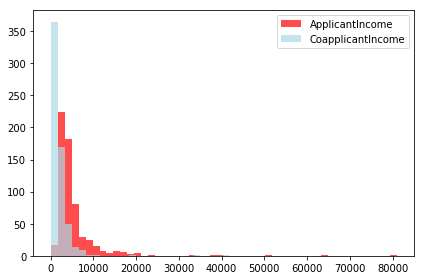

In [8]:
plt.hist(dfTrain['ApplicantIncome'], bins = 50, alpha = 0.7, label = 'ApplicantIncome', facecolor = 'red')
plt.hist(dfTrain['CoapplicantIncome'], bins = 25, alpha = 0.7, label = 'CoapplicantIncome', facecolor = 'lightblue')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

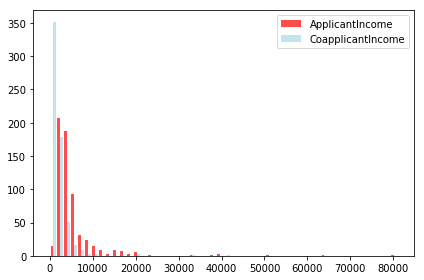

In [9]:
plt.hist([dfTrain['ApplicantIncome'], dfTrain['CoapplicantIncome']], bins = 50, alpha = 0.7, label = ['ApplicantIncome', 'CoapplicantIncome'], color = ['red', 'lightblue'])
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

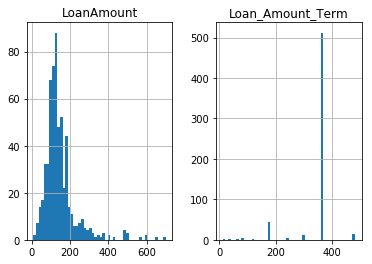

In [10]:
ApplicantIncomeHist = dfTrain[['LoanAmount','Loan_Amount_Term']].hist(bins=50)

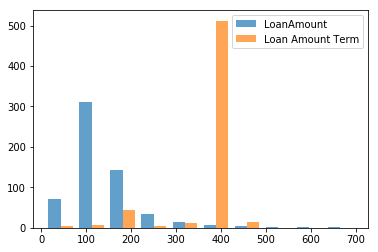

In [11]:
plt.hist([dfTrain['LoanAmount'].dropna(), dfTrain['Loan_Amount_Term']], alpha = 0.7, label = ['LoanAmount', 'Loan Amount Term'])
plt.legend(loc='upper right')
plt.show()

## 1.3. Boxplots

## 1.4. Correlation between variables

#### Correlation coefficients of numerical variables using Pearson coefficient

In [12]:
dfTrain.corr('pearson')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


#### Correlation coefficients of numerical variables using Spearman coefficient

In [13]:
dfTrain.corr('spearman')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.320056,0.515397,-0.040111,0.043241
CoapplicantIncome,-0.320056,1.000000,0.240719,-0.013747,-0.007458
LoanAmount,0.515397,0.240719,1.000000,0.041486,-0.002361
Loan_Amount_Term,-0.040111,-0.013747,0.041486,1.000000,0.015088
Credit_History,0.043241,-0.007458,-0.002361,0.015088,1.000000


Why use both?
When exploring the data it is a good option to compute both. Let's take a look at their definitions first:

- Pearson: Depicts linear relationships between variables, computed on the real values of variables. So, if a variable increases the other will increase proportionally. Also, Pearson assumes linearity and constant variance, in case these are not met, it is preferred to go with Spearman.
- Spearman: Depicts monotonic relationships between variables since it is computed on ranks.

The key point is that if Pearson > Spearman, this means that linearity might overweight monotonicity, and viceversa. Taking this into account, I compute their differences, and see if it is true:

In [14]:
dfTrain.corr('pearson') - dfTrain.corr('spearman')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,0.000000,0.203451,0.055512,-0.005195,-0.057955
CoapplicantIncome,0.203451,0.000000,-0.052100,-0.046131,0.005402
LoanAmount,0.055512,-0.052100,0.000000,-0.002039,-0.006072
Loan_Amount_Term,-0.005195,-0.046131,-0.002039,0.000000,-0.013618
Credit_History,-0.057955,0.005402,-0.006072,-0.013618,0.000000


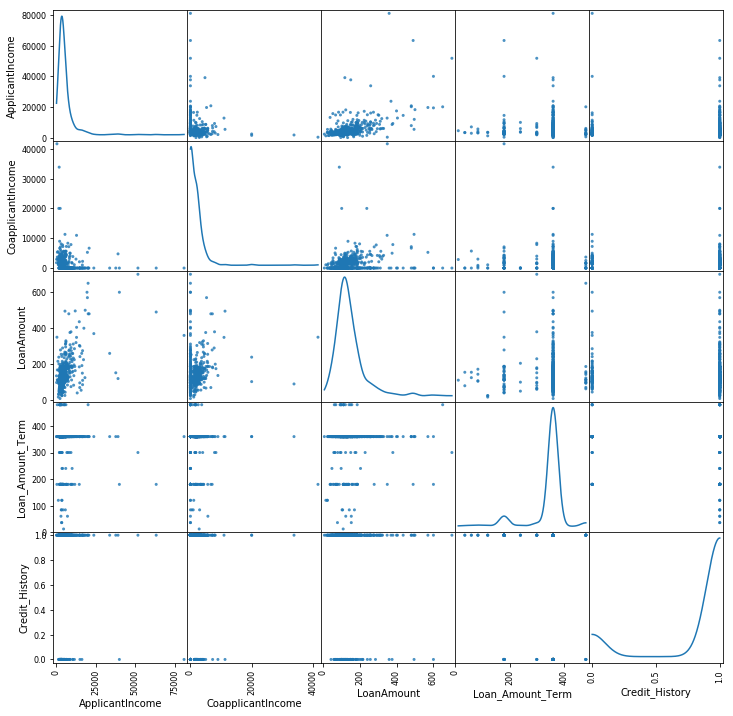

In [15]:
pd.plotting.scatter_matrix(dfTrain, alpha = 0.8, figsize = (12, 12), diagonal = 'kde')
plt.show()

## 2. Variable transformation

Depending on the model used, variables can go directly into it, for example with trees. However, for other models, mainly lienar, such as logistic regressions, categorical variables must be transformed for the model to work smoothly. Categorical variables can be transformed into numeric variables (concretely to binary variables) by various methods. Let's see what can we do to:
- Gender
- Married
- Dependents
- Education
- Self_Employed
- Property_Area
- Loan_Status

The path to follow with categorical variables is to dummify or do one hot encodings. The difference between them is that being k the number of categories in a given variable, dummifying creates k-1 dummy variables referring to the categories of the original variable. OHE creates k new variables. 

#### OHE

In [16]:
categoricalVars = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area", "Loan_Status"]
dfTrainDummies = pd.get_dummies(dfTrain[categoricalVars])
dfTrainMerged = pd.concat([dfTrain, dfTrainDummies], sort = False, axis=1)
dfTrainMerged = dfTrainMerged.drop(columns = categoricalVars)
dfTrainMerged = dfTrainMerged.drop(columns = 'Loan_Status_N')

Note that I dropped Loan_Status_N to leave only one target: Loan_Status = Y

In [17]:
dfTrainMerged.corr(method = 'pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
ApplicantIncome,1.0,-0.12,0.57,-0.045,-0.015,-0.059,0.014,-0.052,0.05,-0.09,0.041,-0.035,0.16,0.14,-0.14,-0.12,0.13,0.016,-0.014,-0.0006,-0.0047
CoapplicantIncome,-0.12,1.0,0.19,-0.06,-0.0021,-0.083,0.082,-0.076,0.08,0.00095,-0.03,0.01,0.041,0.062,-0.062,-0.029,-0.016,0.0053,-0.027,0.023,-0.059
LoanAmount,0.57,0.19,1.0,0.039,-0.0084,-0.11,0.066,-0.15,0.15,-0.14,0.064,0.02,0.16,0.17,-0.17,-0.11,0.12,0.044,-0.0084,-0.034,-0.037
Loan_Amount_Term,-0.045,-0.06,0.039,1.0,0.0015,0.075,-0.071,0.1,-0.1,0.11,-0.087,-0.0078,-0.078,0.079,-0.079,0.041,-0.034,0.035,0.062,-0.098,-0.021
Credit_History,-0.015,-0.0021,-0.0084,0.0015,1.0,-0.013,0.026,-0.0061,0.0013,0.048,0.0027,0.013,-0.06,0.082,-0.082,-0.037,-0.0024,-0.021,0.042,-0.024,0.56
Gender_Female,-0.059,-0.083,-0.11,0.075,-0.013,1.0,-0.93,0.36,-0.37,0.15,0.0045,-0.13,-0.096,0.045,-0.045,-0.024,0.00052,-0.08,0.11,-0.035,-0.018
Gender_Male,0.014,0.082,0.066,-0.071,0.026,-0.93,1.0,-0.34,0.34,-0.14,0.0083,0.13,0.064,-0.061,0.061,0.039,-0.027,0.075,-0.11,0.044,0.025
Married_No,-0.052,-0.076,-0.15,0.1,-0.0061,0.36,-0.34,1.0,-0.99,0.35,-0.11,-0.25,-0.13,0.012,-0.012,-0.022,-0.0045,0.0068,-0.0058,-0.00055,-0.091
Married_Yes,0.05,0.08,0.15,-0.1,0.0013,-0.37,0.34,-0.99,1.0,-0.34,0.12,0.25,0.14,-0.018,0.018,0.017,0.0085,-0.00022,-0.00023,0.00045,0.084
Dependents_0,-0.09,0.00095,-0.14,0.11,0.048,0.15,-0.14,0.35,-0.34,1.0,-0.51,-0.5,-0.34,0.042,-0.042,0.068,-0.088,0.061,-0.0062,-0.052,0.0063


Hay que convertir aún Dependents a factor con niveles 0, 1, 2, 3, más de tres y PropertyAarea 

### 2.1 Normalisation

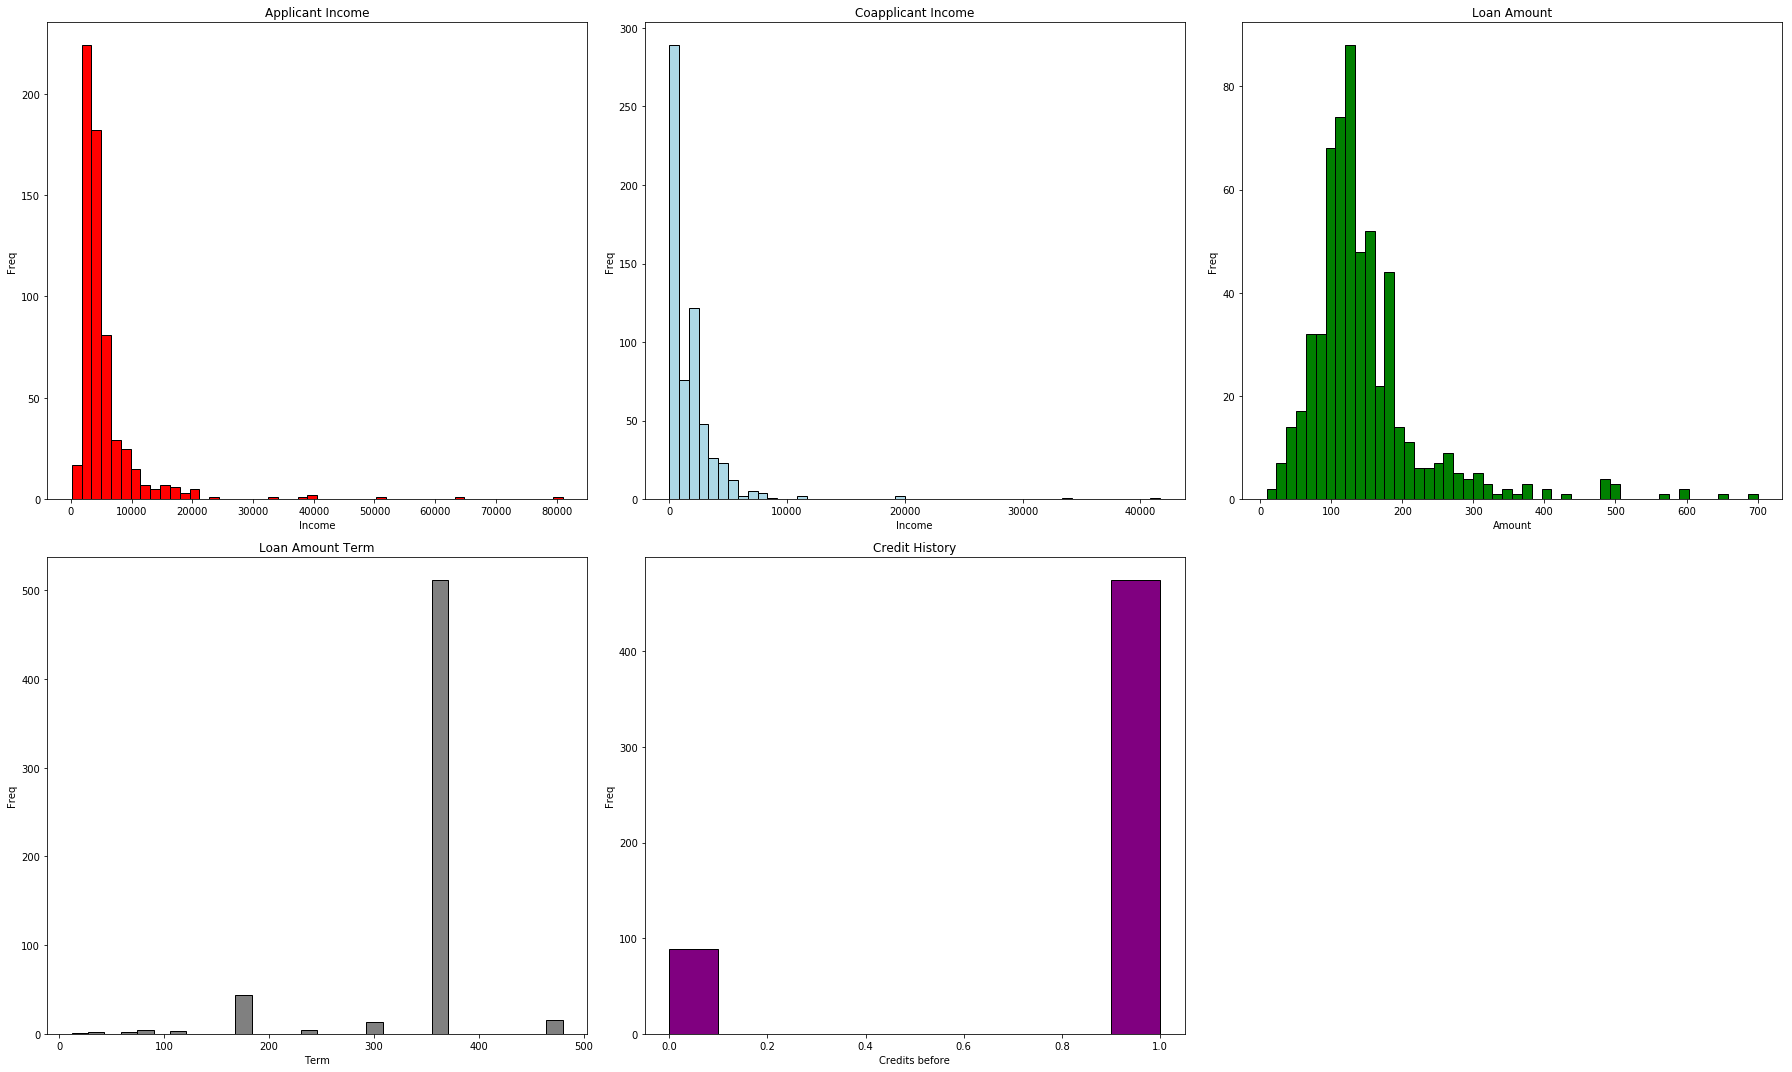

In [18]:
fig = plt.figure(figsize = (25,15))
axesAI = fig.add_subplot(231)
axesCI = fig.add_subplot(232)
axesLA = fig.add_subplot(233)
axesLAT = fig.add_subplot(234)
axesCH = fig.add_subplot(235)

axesAI.hist(dfTrain['ApplicantIncome'], bins = 50, facecolor = 'red', edgecolor = 'black')
axesAI.set(title = 'Applicant Income', xlabel = "Income", ylabel = "Freq")

axesCI.hist(dfTrain['CoapplicantIncome'], bins = 50, facecolor = 'lightblue', edgecolor = 'black')
axesCI.set(title = 'Coapplicant Income', xlabel = "Income", ylabel = "Freq")

axesLA.hist(dfTrain['LoanAmount'].dropna(), bins = 50, facecolor = 'green', edgecolor = 'black')
axesLA.set(title = 'Loan Amount', xlabel = "Amount", ylabel = "Freq")

axesLAT.hist(dfTrain['Loan_Amount_Term'].dropna(), bins = 30, facecolor = 'grey', edgecolor = 'black')
axesLAT.set(title = 'Loan Amount Term', xlabel = "Term", ylabel = "Freq")

axesCH.hist(dfTrain['Credit_History'].dropna(), bins = 10, facecolor = 'purple', edgecolor = 'black')
axesCH.set(title = 'Credit History', xlabel = "Credits before", ylabel = "Freq")

plt.tight_layout()
plt.show()

In [19]:
dfTrainTransformed = dfTrain.copy()

dfTrainTransformed['ApplicantIncome'] = np.log(dfTrainTransformed['ApplicantIncome'])
# dfTrainTransformed['CoapplicantIncome'] = np.log(dfTrainTransformed['CoapplicantIncome'])
# dfTrainTransformed['LoanAmount'] = np.log(dfTrainTransformed['LoanAmount'])

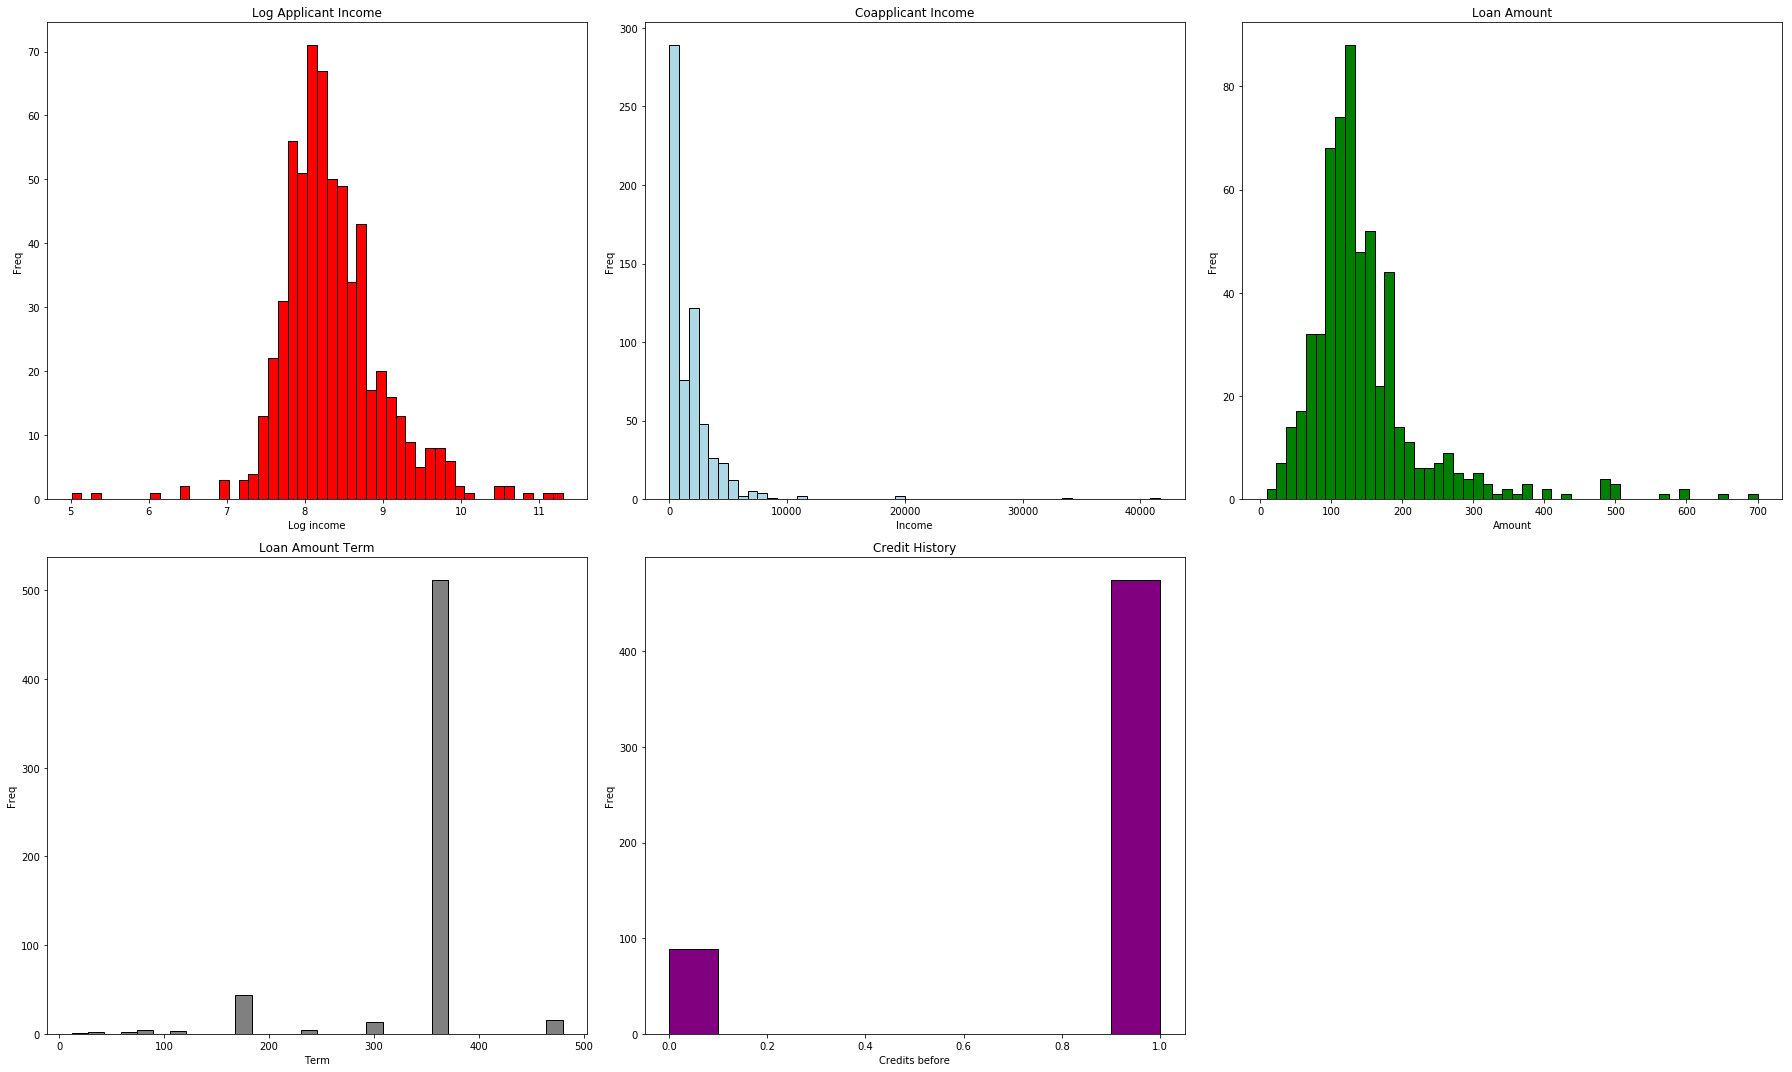

In [21]:
fig = plt.figure(figsize = (25,15))
axesAI = fig.add_subplot(231)
axesCI = fig.add_subplot(232)
axesLA = fig.add_subplot(233)
axesLAT = fig.add_subplot(234)
axesCH = fig.add_subplot(235)

axesAI.hist(dfTrainTransformed['ApplicantIncome'], bins = 50, facecolor = 'red', edgecolor = 'black')
axesAI.set(title = 'Log Applicant Income', xlabel = "Log income", ylabel = "Freq")

axesCI.hist(dfTrainTransformed['CoapplicantIncome'], bins = 50, facecolor = 'lightblue', edgecolor = 'black')
axesCI.set(title = 'Coapplicant Income', xlabel = "Income", ylabel = "Freq")

axesLA.hist(dfTrainTransformed['LoanAmount'].dropna(), bins = 50, facecolor = 'green', edgecolor = 'black')
axesLA.set(title = 'Loan Amount', xlabel = "Amount", ylabel = "Freq")

axesLAT.hist(dfTrainTransformed['Loan_Amount_Term'].dropna(), bins = 30, facecolor = 'grey', edgecolor = 'black')
axesLAT.set(title = 'Loan Amount Term', xlabel = "Term", ylabel = "Freq")

axesCH.hist(dfTrainTransformed['Credit_History'].dropna(), bins = 10, facecolor = 'purple', edgecolor = 'black')
axesCH.set(title = 'Credit History', xlabel = "Credits before", ylabel = "Freq")

plt.tight_layout()
plt.show()